### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

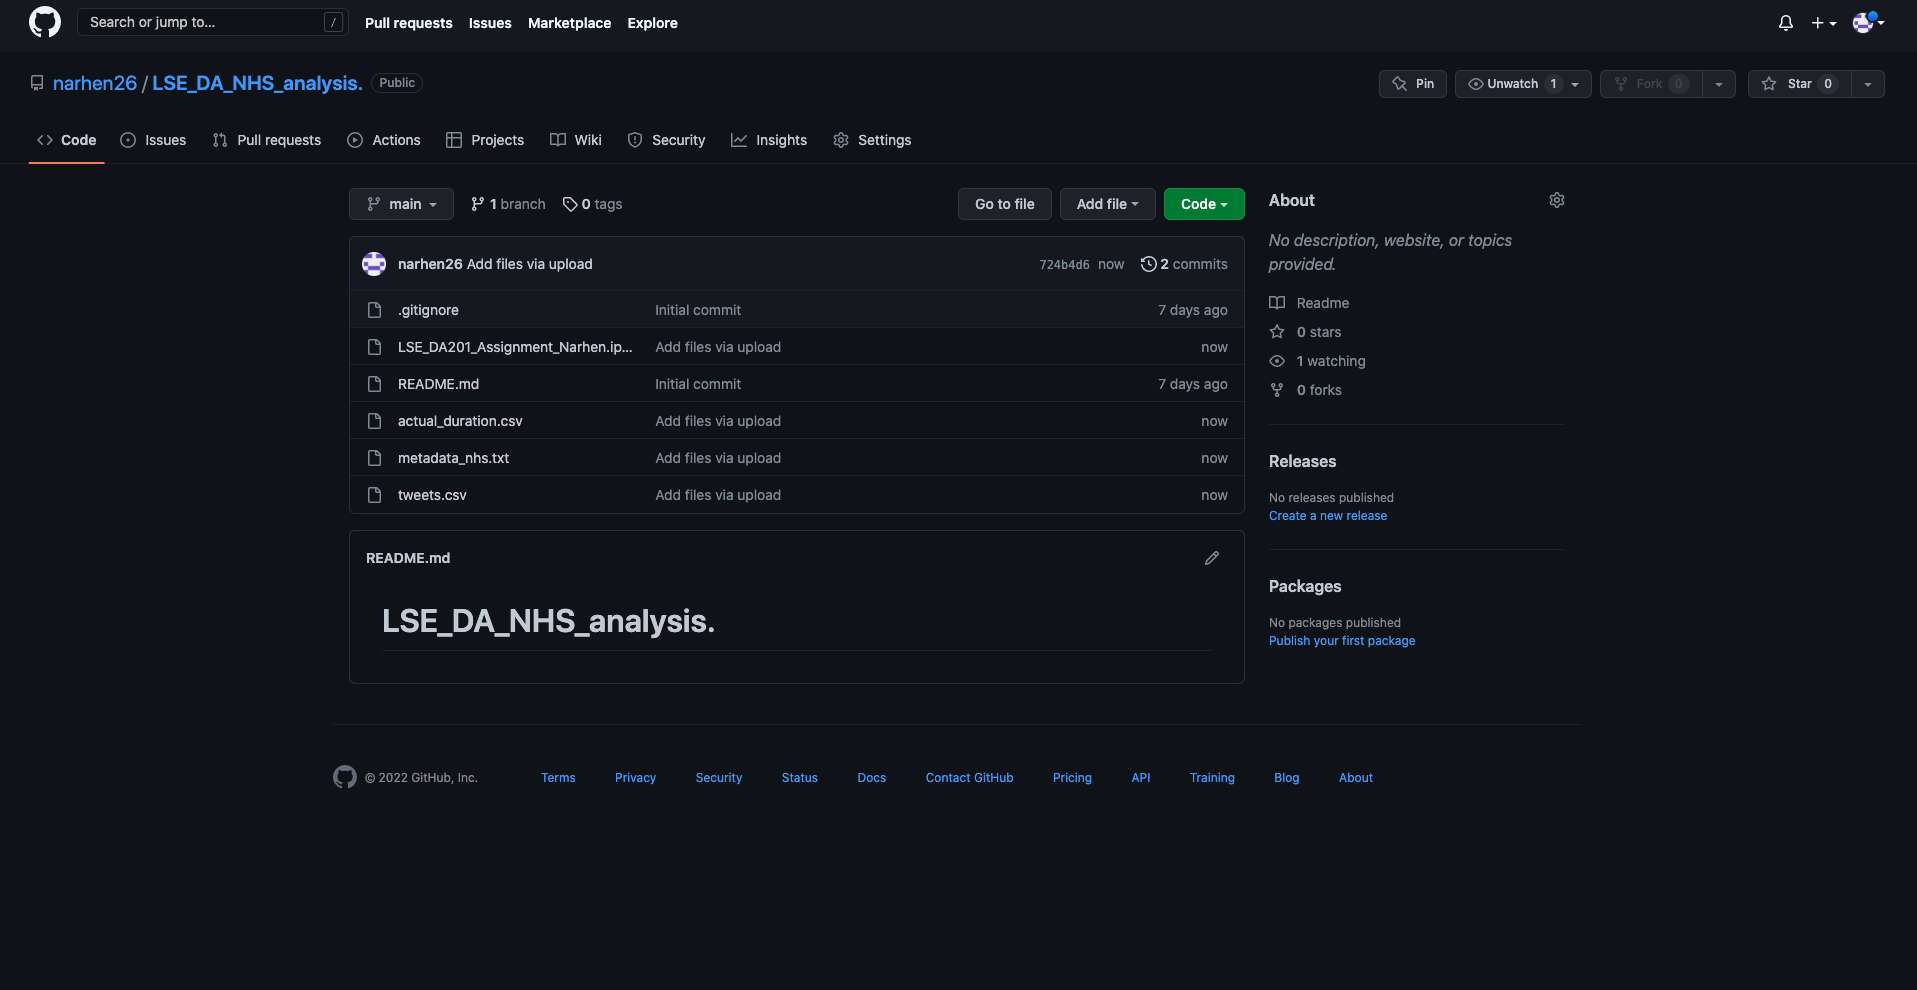

In [148]:
# My GitHub repository.
GitHub_screenshot = Image.open("GitHub_repo.png")
GitHub_screenshot

# 

# Assignment activity 2 - Exploring the Data

### Prepare your workstation

In [147]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
from PIL import Image 

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv("actual_duration.csv")

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [4]:
# Determine whether there are missing values.
# Creating a DataFrame which contains only the rows with missing data.
ad_na = ad[ad.isna().any(axis=1)]
# Printing shape of the new dataframe, ad_na.
print(ad_na.shape)
# Printing the DataFrame.
# No rows indicating no missing data.
ad_na

(0, 8)


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments


In [5]:
# Determine the metadata of the data set.
# Using info() to determine the exact columns where we have missing data.
# There are no rows with missing data
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [6]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [7]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv("appointments_regional.csv")

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [8]:
# Determine whether there are missing values.
# Creating a DataFrame which contains only the rows with missing data.
ar_na = ar[ar.isna().any(axis=1)]
# Printing shape of the new dataframe
print(ar_na.shape)
# Printing the DataFrame.
ar_na
## There are no missing values here.

(0, 7)


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments


In [9]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [10]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [11]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel("national_categories.xlsx")

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [13]:
# Determine whether there are missing values.
# Creating a DataFrame which contains only the rows with missing data.
nc_na = nc[nc.isna().any(axis=1)]
# Printing shape of the new dataframe.
print(nc_na.shape)
# Printing the DataFrame.
nc_na
#Empty Dataframe indicating no missing values.

(0, 8)


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month


In [14]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [15]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


#### Observations

- .info() provides the datatype of the columns within it's output (this is also true for all other parts of code where I have used both .dtypes() and .info()).

- The csv file consists of 817394 rows of data seperated into 7 columns.

- .info() shows that there are no missing rows of data.

### Explore the data set

**Question 1:** How many locations are there in the data set?

In [16]:
# Determine the number of locations.
count = nc['sub_icb_location_name'].drop_duplicates().size
print("The number of locations in the data set is "+ str(count))


The number of locations in the data set is 106


**Question 2:** What are the five locations with the highest number of records?



In [190]:
# Determine the top five locations based on record count.
nc['sub_icb_location_name'].value_counts().nlargest(5)
print("The 5 highest locations are NHS North West London, NHS Kent and Medway ICB, NHS Devon, NHS Hampshire and Isle Of Wight and NHS North East London.")


The 5 highest locations are NHS North West London, NHS Kent and Medway ICB, NHS Devon, NHS Hampshire and Isle Of Wight and NHS North East London.


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [150]:
# Determine the number of service settings.
count = nc['service_setting'].drop_duplicates().size
print("The number of service settings in the data set is "+ str(count))

The number of service settings in the data set is 5


In [151]:
# Determine the number of context types.
count = nc['context_type'].drop_duplicates().size
print("The number of context types in the data set is "+ str(count))

The number of context types in the data set is 3


In [152]:
# Determine the number of national categories.
count = nc['national_category'].drop_duplicates().size
print("The number of national categories in the data set is "+ str(count))

The number of national categories in the data set is 18


In [153]:
# Determine the number of appointment status.
count = ar['appointment_status'].drop_duplicates().size
print("The number of appointment statuses in the data set is "+ str(count))

The number of appointment statuses in the data set is 3


In [154]:
count = ar['appointment_mode'].drop_duplicates().size
print("The number of appointment types in the data set is "+ str(count))

The number of appointment types in the data set is 5


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [23]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [24]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [155]:
# Change the date format of ad['appointment_date'].
ad["appointment_date"] = ad["appointment_date"].apply(pd.to_datetime)


# View the DateFrame.
ad['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [26]:
# Change the date format of ar['appointment_date'].
nc["appointment_date"] = nc["appointment_date"].apply(pd.to_datetime)


# View the DateFrame.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [27]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
ad['appointment_date'].agg(['min', 'max'])
min_date = ad['appointment_date'].agg('min')
max_date = ad['appointment_date'].agg('max')
print("The first date is "+ str(min_date) +" and the last date is "+str(max_date))

The first date is 2021-12-01 00:00:00 and the last date is 2022-06-30 00:00:00


In [28]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
min_date = nc['appointment_date'].agg('min')
max_date = nc['appointment_date'].agg('max')
print("The first date is "+ str(min_date) +" and the last date is "+str(max_date))

The first date is 2021-08-01 00:00:00 and the last date is 2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [156]:
# For each of these service settings, determine the number of records available for the period and the location. 
# Selecting few columns.
nc_subset = pd.read_excel("national_categories.xlsx",
                                      usecols=['service_setting', 'appointment_date', 'sub_icb_location_name', 'count_of_appointments'])
                
# Print the DataFrame.

filtered_nc = nc_subset.loc[(nc_subset['appointment_date'] >= '2022-01-01')
                     & (nc_subset['appointment_date'] < '2022-06-01')] 

filtered_nc2 = filtered_nc.query("sub_icb_location_name == 'NHS North West London ICB - W2U3Z'")

filtered_nc2['service_setting'].value_counts().nlargest(5)
#The most popular service setting was General Practice with 2087 appointments

General Practice             2087
Other                        1308
Primary Care Network         1263
Extended Access Provision    1080
Unmapped                      151
Name: service_setting, dtype: int64

**Question 3:** Which month had the highest number of appointments?

In [159]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.

nc_app = nc.groupby('appointment_month')[['count_of_appointments']].sum().sort_values('count_of_appointments', ascending=False)
nc_app.reset_index(inplace=True)
nc_app
#November had the highest number of appointments.

,appointment_month,count_of_appointments
0,2021-11,30405070
1,2021-10,30303834
2,2022-03,29595038
3,2021-09,28522501
4,2022-05,27495508
5,2022-06,25828078
6,2022-01,25635474
7,2022-02,25355260
8,2021-12,25140776
9,2022-04,23913060


**Question 4:** What was the total number of records per month?

In [163]:
# Total number of records per month.
nc_app = nc.groupby('appointment_month')[['count_of_appointments']].count()
nc_app

,count_of_appointments
appointment_month,
2021-08,69999
2021-09,74922
2021-10,74078
2021-11,77652
2021-12,72651
2022-01,71896
2022-02,71769
2022-03,82822
2022-04,70012


-I answered these questions by utilising the groupby() function. It was important to create subsets of the huge data sets so that I only dealt with relevant columns and reduced the timeframe needed to run the code.
- I was also able to utilised docstrings to print my answers which would make the answer much clearer.

# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [38]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [191]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc["appointment_month"] = nc["appointment_month"].astype('string')

In [192]:
#Checking to see if the datatype has changed.
print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                string
dtype: object


In [193]:
#Creating a subset of the 'nc' table and using the Use the groupby() function to group the monthly appointments and service settings for the nc DataFrame.
nc['appointment_month'] = nc['appointment_month'].astype(str)
nc_ss = nc[["appointment_month", "service_setting", "count_of_appointments"]]
nc_ss = nc_ss.groupby(['appointment_month','service_setting'])['count_of_appointments'].sum()
nc_ss = pd.DataFrame(nc_ss)
nc_ss.reset_index()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


**Service settings:**

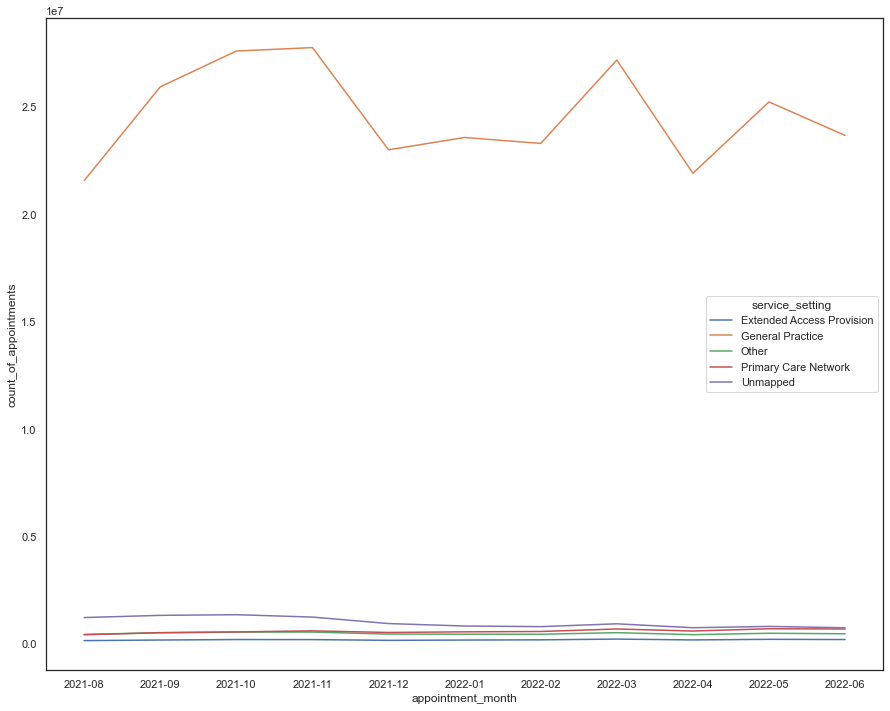

In [39]:
sns.lineplot(x='appointment_month', y='count_of_appointments',
             data=nc_ss,
             hue = 'service_setting', ci=None)
sns.set(rc={'figure.figsize':(15, 12)})

**Context types:**

In [40]:
# Create a separate data set that can be used in future weeks. 
# Aggregate on monthly level and determine the sum of records per month.
nc_ss1 = nc[["appointment_month", "context_type", "count_of_appointments"]]
nc_ss1 = nc_ss1.groupby(['appointment_month','context_type'])['count_of_appointments'].sum()
nc_ss1 = pd.DataFrame(nc_ss1)
nc_ss1.reset_index()

# View output.


,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


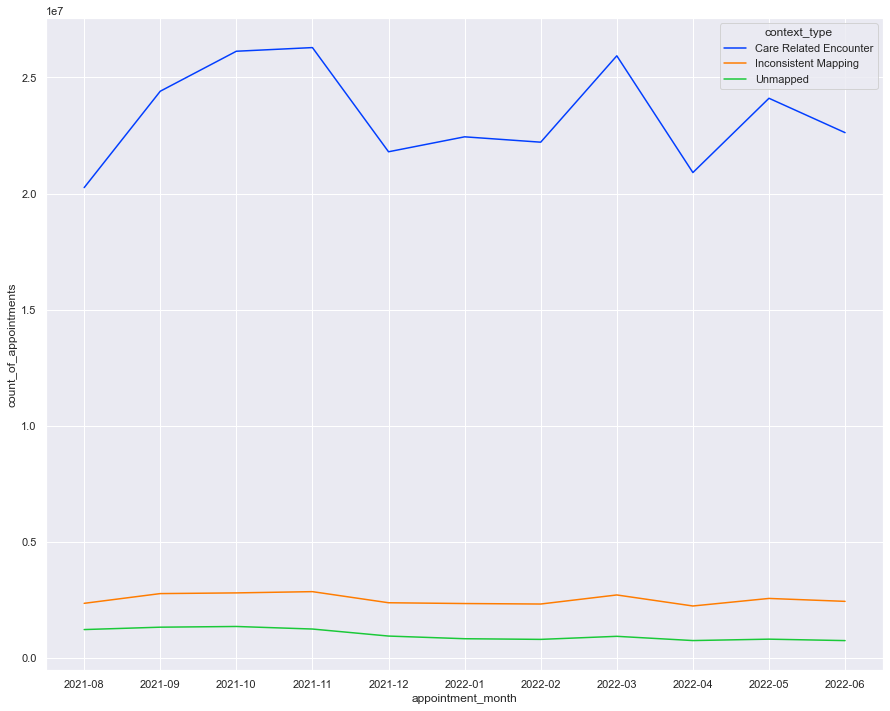

In [165]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_ss1, hue='context_type', ci=None, palette='bright')
sns.set(rc={'figure.figsize':(15, 12)})

**National categories:**

In [42]:
# Create a separate data set that can be used in future weeks. 
nc_ss2 = nc[["appointment_month", "national_category", "count_of_appointments"]]
nc_ss2 = nc_ss2.groupby(['appointment_month','national_category'])['count_of_appointments'].sum()
nc_ss2 = pd.DataFrame(nc_ss2)
nc_ss2.reset_index()

# View output.


,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
...,...,...,...
193,2022-06,Social Prescribing Service,55066
194,2022-06,Structured Medication Review,187800
195,2022-06,Unmapped,758640
196,2022-06,Unplanned Clinical Activity,274491


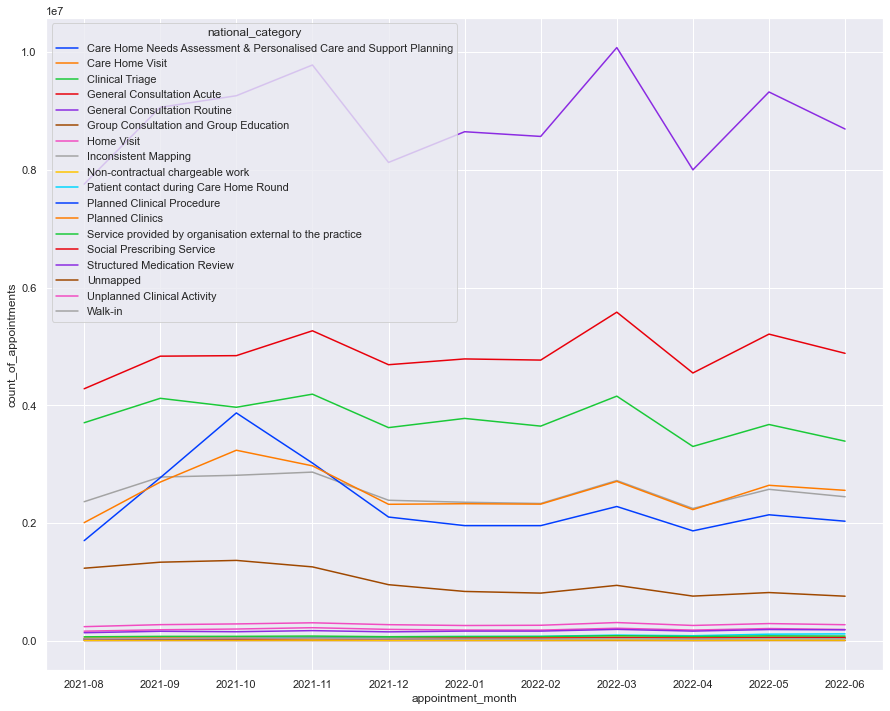

In [43]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_ss2, hue='national_category', ci=None, palette='bright')
sns.set(rc={'figure.figsize':(15, 12)})

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [166]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day= nc[["appointment_month", "service_setting", "appointment_date", "count_of_appointments"]]
nc_ss_day = nc_ss_day.groupby(['appointment_month','service_setting','appointment_date'])['count_of_appointments'].sum()

nc_ss_day = pd.DataFrame(nc_ss_day)
nc_ss_day.head()
# Create a separate data set that can be used in future weeks. 
nc_ss_day= nc[["appointment_month", "service_setting", "appointment_date", "count_of_appointments"]]
nc_ss_day = nc_ss_day.groupby(['appointment_month','service_setting','appointment_date'])['count_of_appointments'].sum()

nc_ss_day = pd.DataFrame(nc_ss_day)
nc_ss_day.reset_index(inplace=True)
nc_ss_day.head()
# View output.

# View output.


,appointment_month,service_setting,appointment_date,count_of_appointments
0,2021-08,Extended Access Provision,2021-08-01,438
1,2021-08,Extended Access Provision,2021-08-02,7705
2,2021-08,Extended Access Provision,2021-08-03,7820
3,2021-08,Extended Access Provision,2021-08-04,6917
4,2021-08,Extended Access Provision,2021-08-05,6841


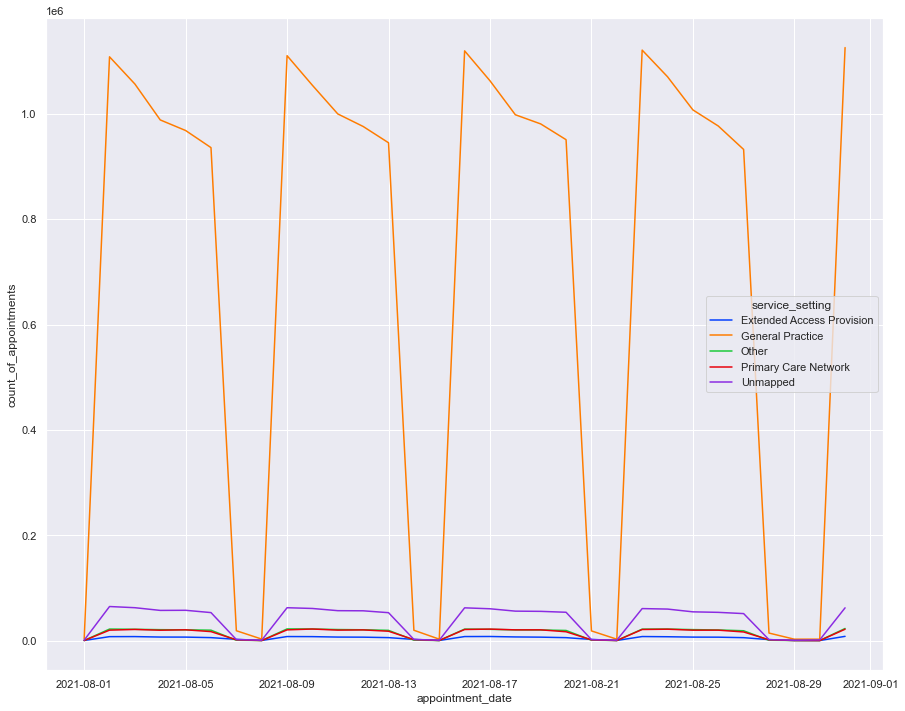

In [45]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day[nc_ss_day['appointment_month']=='2021-08'],
             hue='service_setting', ci=None, palette='bright')
                                                                                                                                                           
sns.set(rc={'figure.figsize':(15, 12)})


**Autumn (October 2021):**

<AxesSubplot:xlabel='appointment_date', ylabel='count_of_appointments'>

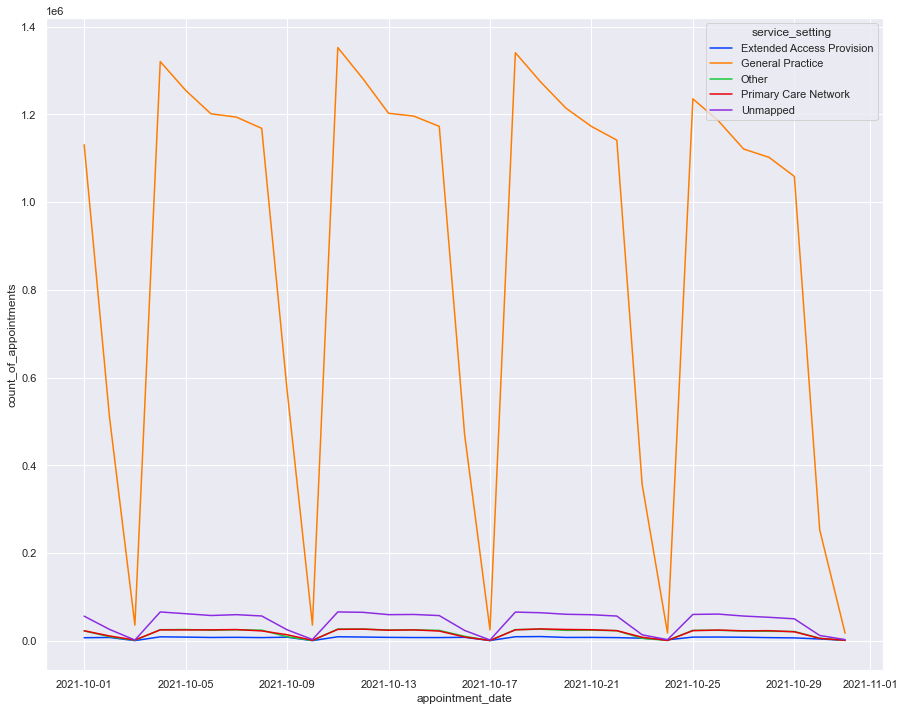

In [103]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day[nc_ss_day['appointment_month']=='2021-10'], hue='service_setting', ci=None, palette='bright')


**Winter (January 2022):**

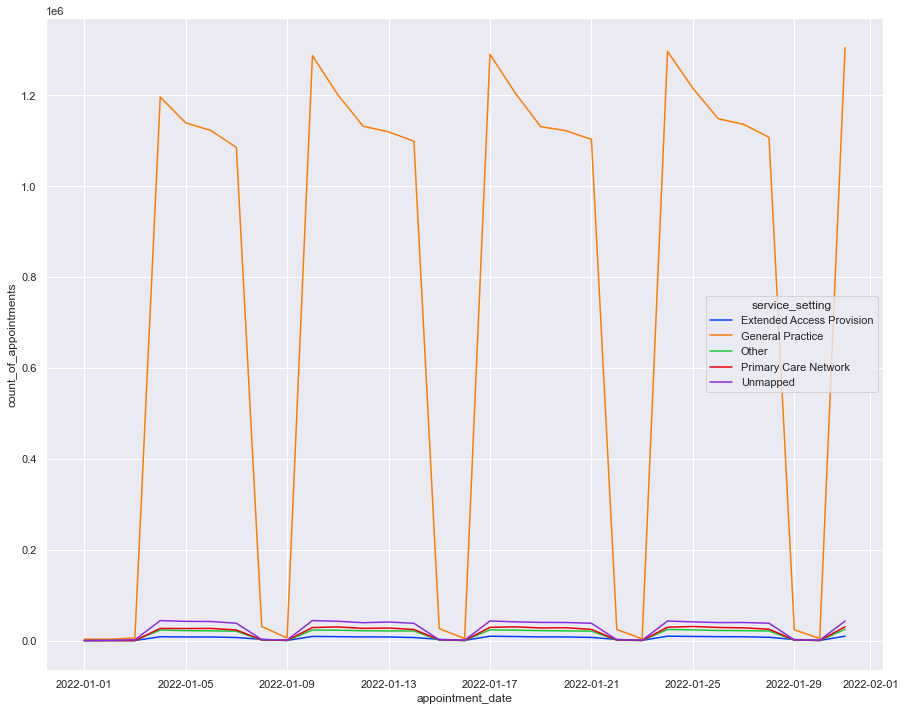

In [104]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day[nc_ss_day['appointment_month']=='2022-01'], hue='service_setting', ci=None, palette='bright')
sns.set(rc={'figure.figsize':(15, 12)})

**Spring (April 2022):**

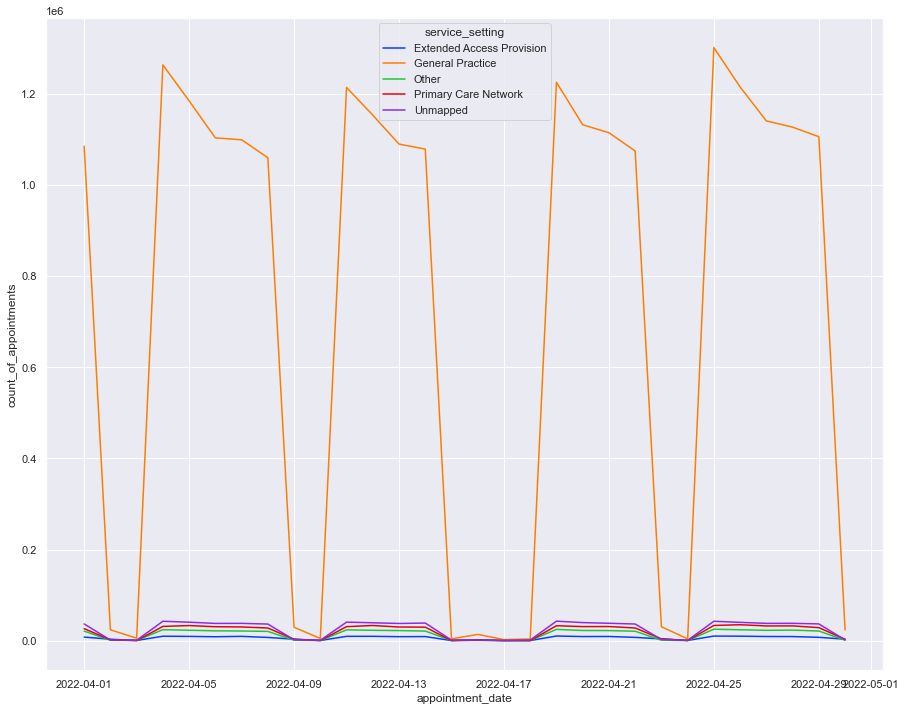

In [105]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day[nc_ss_day['appointment_month']=='2022-04'], hue='service_setting', ci=None, palette='bright')
sns.set(rc={'figure.figsize':(15, 12)})

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [49]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [50]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [51]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [52]:
# Explore the data set.
print(tweets.dtypes)
print(tweets.shape)
print(tweets.describe())

tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object
(1174, 10)
           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000


In [197]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.
tweets['tweet_favorite_count'].value_counts()
#It wouldnt be wise to only look at retweeted and favorite tweet messages as the data is extremely scattered. There is not enough of a trend to justify looking at it.

0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64

In [54]:
# Create a new DataFrame containing only the text.
tweets_text = pd.read_csv('tweets.csv', usecols=['tweet_full_text'])

# View the DataFrame.
tweets_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [55]:
# Loop through the messages, and create a list of values containing the # symbol.
tweets_extract = tweets_text.tweet_full_text.str.extractall(r'(\#\w+)')[0].value_counts()
tweets_extract

#healthcare          599
#Healthcare          198
#health               70
#HealthCare           47
#AI                   45
                    ... 
#epiccare              1
#patientreview         1
#PublicSector          1
#socialprescriber      1
#csjmu                 1
Name: 0, Length: 1681, dtype: int64

In [56]:
# Display the first 30 records.
tweets_df = pd.DataFrame(tweets_extract).reset_index()

tweets_df.head(30)



,index,0
0,#healthcare,599
1,#Healthcare,198
2,#health,70
3,#HealthCare,47
4,#AI,45
5,#medicine,42
6,#job,38
7,#strategy,31
8,#medical,30
9,#biotech,25


In [57]:
# Convert the series to a DataFrame in preparation for visualisation.
# Rename the columns.
tweets_df1 = tweets_df.rename(columns={'index': 'Word', 0 : 'Count'})

tweets_df1

,Word,Count
0,#healthcare,599
1,#Healthcare,198
2,#health,70
3,#HealthCare,47
4,#AI,45
...,...,...
1676,#epiccare,1
1677,#patientreview,1
1678,#PublicSector,1
1679,#socialprescriber,1


In [58]:
# Fix the count datatype.
tweets_df1.dtypes
# View the result.


Word     object
Count     int64
dtype: object

In [59]:
# Display records where the count is larger than 10.
tweets_ten = tweets_df1.loc[(tweets_df1['Count']>10)]
tweets_ten

,Word,Count
0,#healthcare,599
1,#Healthcare,198
2,#health,70
3,#HealthCare,47
4,#AI,45
5,#medicine,42
6,#job,38
7,#strategy,31
8,#medical,30
9,#biotech,25


[Text(0, 0, '#healthcare'),
 Text(1, 0, '#Healthcare'),
 Text(2, 0, '#health'),
 Text(3, 0, '#HealthCare'),
 Text(4, 0, '#AI'),
 Text(5, 0, '#medicine'),
 Text(6, 0, '#job'),
 Text(7, 0, '#strategy'),
 Text(8, 0, '#medical'),
 Text(9, 0, '#biotech'),
 Text(10, 0, '#digitalhealth'),
 Text(11, 0, '#MedTwitter'),
 Text(12, 0, '#pharma'),
 Text(13, 0, '#competitiveintelligence'),
 Text(14, 0, '#marketing'),
 Text(15, 0, '#pharmaceutical'),
 Text(16, 0, '#MedEd'),
 Text(17, 0, '#TipsForNewDocs'),
 Text(18, 0, '#Health'),
 Text(19, 0, '#hiring'),
 Text(20, 0, '#vaccine'),
 Text(21, 0, '#MachineLearning'),
 Text(22, 0, '#coronavirus'),
 Text(23, 0, '#WomenInMedicine'),
 Text(24, 0, '#competitivemarketing'),
 Text(25, 0, '#medicare'),
 Text(26, 0, '#telehealth'),
 Text(27, 0, '#news'),
 Text(28, 0, '#DoctorofVeterinaryMedicine'),
 Text(29, 0, '#PatientCare'),
 Text(30, 0, '#FOAMed'),
 Text(31, 0, '#NEW'),
 Text(32, 0, '#telemedicine'),
 Text(33, 0, '#Python'),
 Text(34, 0, '#covid'),
 Text(35,

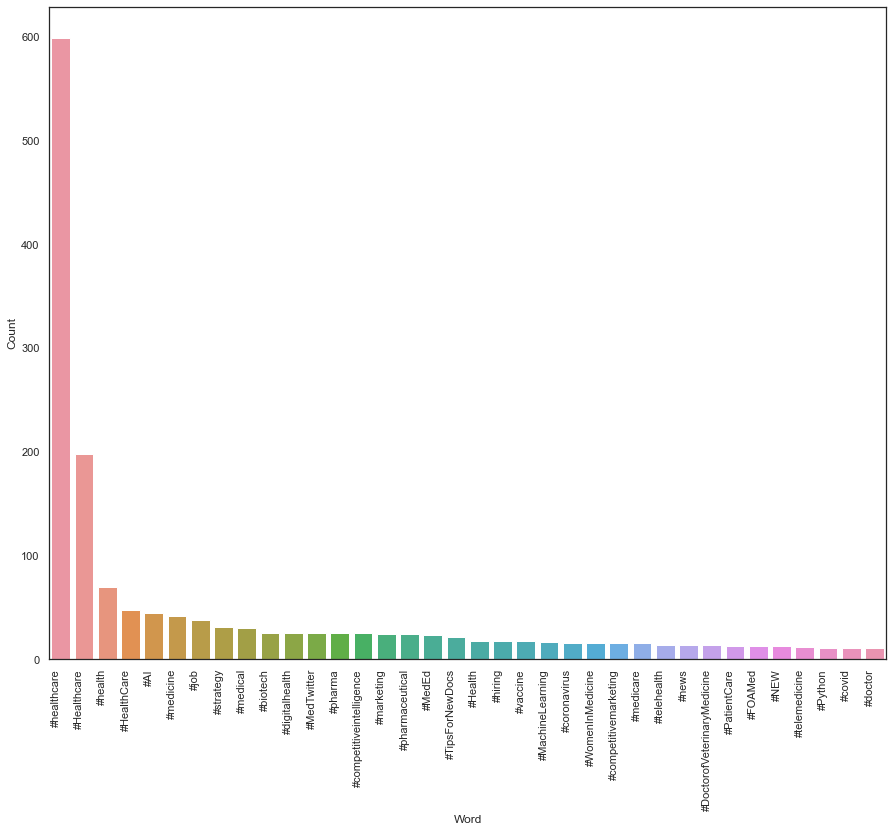

In [60]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns_barplot = sns.barplot(x='Word', y= 'Count', data=tweets_ten)
sns_barplot.set_xticklabels(sns_barplot.get_xticklabels(), rotation=90, ha='right')

[Text(0, 0, '#HealthCare'),
 Text(1, 0, '#AI'),
 Text(2, 0, '#medicine'),
 Text(3, 0, '#job'),
 Text(4, 0, '#strategy'),
 Text(5, 0, '#medical'),
 Text(6, 0, '#biotech'),
 Text(7, 0, '#digitalhealth'),
 Text(8, 0, '#MedTwitter'),
 Text(9, 0, '#pharma'),
 Text(10, 0, '#competitiveintelligence'),
 Text(11, 0, '#marketing'),
 Text(12, 0, '#pharmaceutical'),
 Text(13, 0, '#MedEd'),
 Text(14, 0, '#TipsForNewDocs'),
 Text(15, 0, '#Health'),
 Text(16, 0, '#hiring'),
 Text(17, 0, '#vaccine'),
 Text(18, 0, '#MachineLearning'),
 Text(19, 0, '#coronavirus'),
 Text(20, 0, '#WomenInMedicine'),
 Text(21, 0, '#competitivemarketing'),
 Text(22, 0, '#medicare'),
 Text(23, 0, '#telehealth'),
 Text(24, 0, '#news'),
 Text(25, 0, '#DoctorofVeterinaryMedicine'),
 Text(26, 0, '#PatientCare'),
 Text(27, 0, '#FOAMed'),
 Text(28, 0, '#NEW'),
 Text(29, 0, '#telemedicine'),
 Text(30, 0, '#Python'),
 Text(31, 0, '#covid'),
 Text(32, 0, '#doctor')]

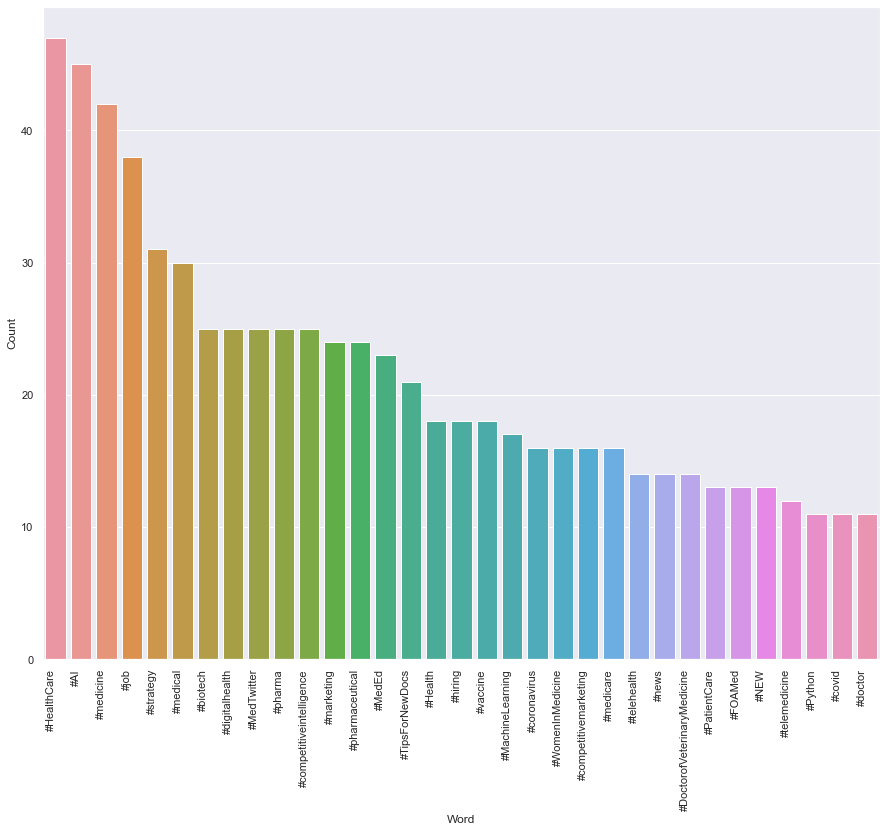

In [167]:
# Create the plot.
#Dropped the first 3 hashtags as their count was a lot higher than the rest of the hashtags.
updated_tweets = tweets_ten.drop([tweets_ten.index[0], tweets_ten.index[1], tweets_ten.index[2]])
updated_tweets

sns_barplot = sns.barplot(x='Word', y= 'Count', data=updated_tweets)
sns_barplot.set_xticklabels(sns_barplot.get_xticklabels(), rotation=90, ha='right')
# View the barplot.


# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [63]:
# Prepare your workstation.
# Load the appointments_regional.csv file.

ar = pd.read_csv('appointments_regional.csv')
# View the DataFrame.
ar.head()
print(ar.dtypes)


icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [64]:
# Print the min and max dates.
print("The minimum date is 2020-01 and the maximum date is 2022-06.")

The minimum date is 2020-01 and the maximum date is 2022-06.


In [169]:
# Filter the data set to only look at data from 2021-08 onwards.
ar=ar[(ar['appointment_month'] >= '2021-08') & (ar['appointment_month'] <= '2022-06')]

#Checking that the data is within the the timeframe.
ar.tail()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06,Unknown,Unknown,Unknown,Same Day,10


In [170]:
#Checking that the data is within the timeframe.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [66]:
# Create an aggregated data set to review the different features.
ar_agg = ar[["appointment_month", "appointment_status", "hcp_type", "appointment_mode", "time_between_book_and_appointment","count_of_appointments"]]
ar_agg = ar_agg.groupby(["appointment_month", "appointment_status", "hcp_type", "appointment_mode", "time_between_book_and_appointment"])['count_of_appointments'].sum()

ar_agg = pd.DataFrame(ar_agg)
ar_agg.reset_index(inplace=True)

ar_agg

,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,Attended,GP,Face-to-Face,1 Day,507835
1,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,194726
2,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,959486
3,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,102111
4,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [188]:
# Determine the total number of appointments per month.
ar_df = pd.read_csv('appointments_regional.csv', usecols=['appointment_month','count_of_appointments','appointment_status' ])
ar_df = pd.DataFrame(ar_df)
ar_df=ar_df[(ar_df['appointment_month'] >= '2021-08') & (ar_df['appointment_month'] <= '2022-06')]
ar_df.dtypes
ar_df = ar.groupby('appointment_month')[['count_of_appointments']].sum()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = ar_df.count_of_appointments/30
#Round to 1 dp
ar_df.utilisation = ar_df.utilisation.round(1)
# View the DataFrame.
ar_df = pd.DataFrame(ar_df)
ar_df
#reset the index
ar_df2 = ar_df.reset_index()
ar_df2['over_capacity?'] = ar_df2.utilisation-1200000
ar_df2



,appointment_month,count_of_appointments,utilisation,over_capacity?
0,2021-08,23852171,795072.4,-404927.6
1,2021-09,28522501,950750.0,-249250.0
2,2021-10,30303834,1010127.8,-189872.2
3,2021-11,30405070,1013502.3,-186497.7
4,2021-12,25140776,838025.9,-361974.1
5,2022-01,25635474,854515.8,-345484.2
6,2022-02,25355260,845175.3,-354824.7
7,2022-03,29595038,986501.3,-213498.7
8,2022-04,23913060,797102.0,-402898.0
9,2022-05,27495508,916516.9,-283483.1


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

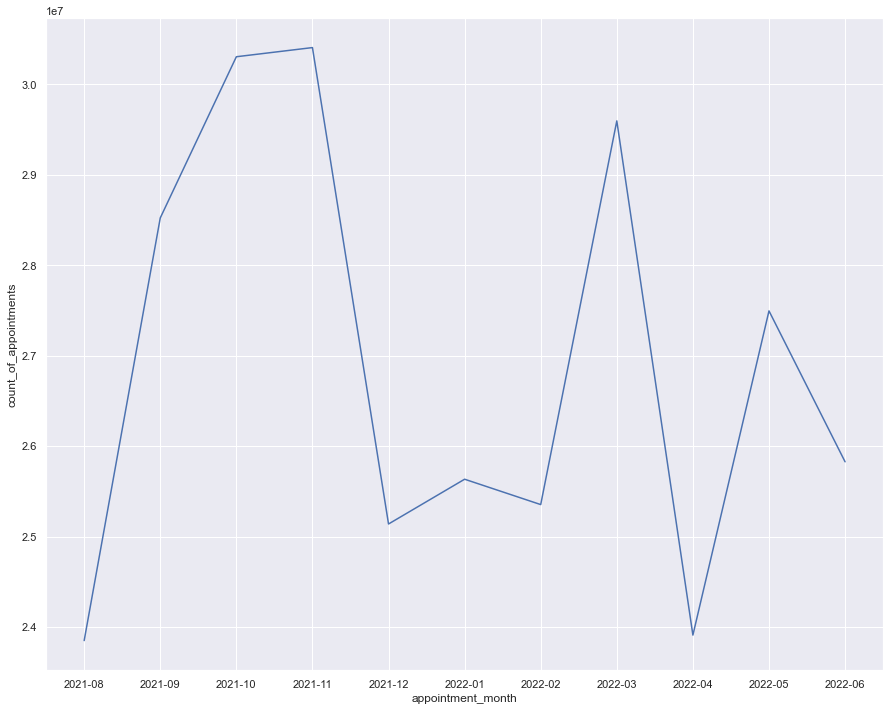

In [185]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df2['appointment_month'] = ar_df2['appointment_month'].astype("string")
ar_df2
# Create a lineplot with Seaborn.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_df2, ci=None, palette='bright')


<AxesSubplot:xlabel='appointment_month', ylabel='utilisation'>

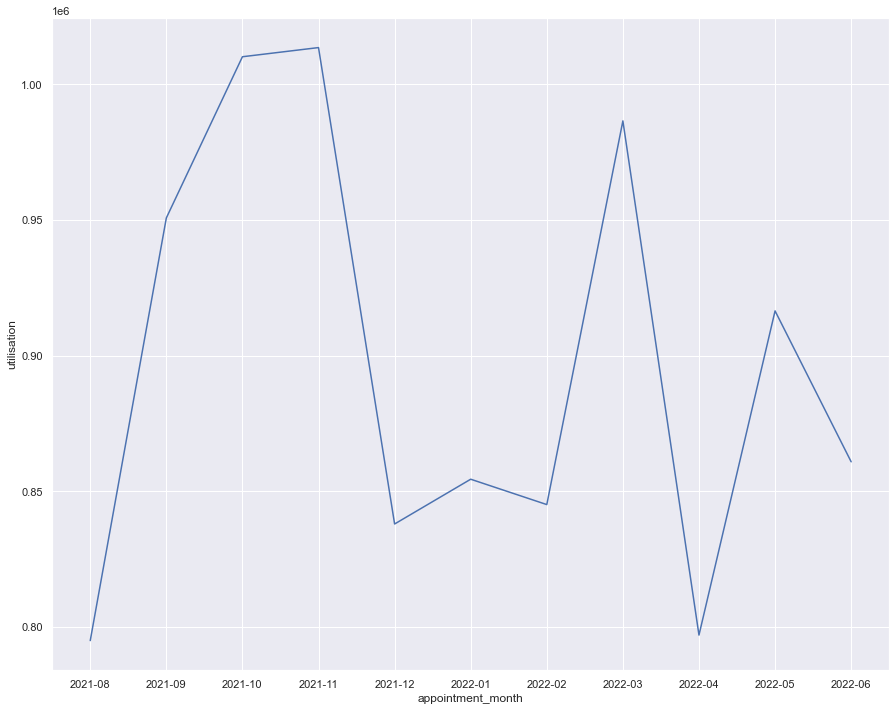

In [186]:
sns.lineplot(x='appointment_month', y='utilisation', data=ar_df, ci=None, palette='bright')


According to the graph, the NHS is always operating within capacity, meaning the NHS' utilisation of resources is doing okay for now.

**Question 2:** How do the healthcare professional types differ over time?

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_hcp_types'>

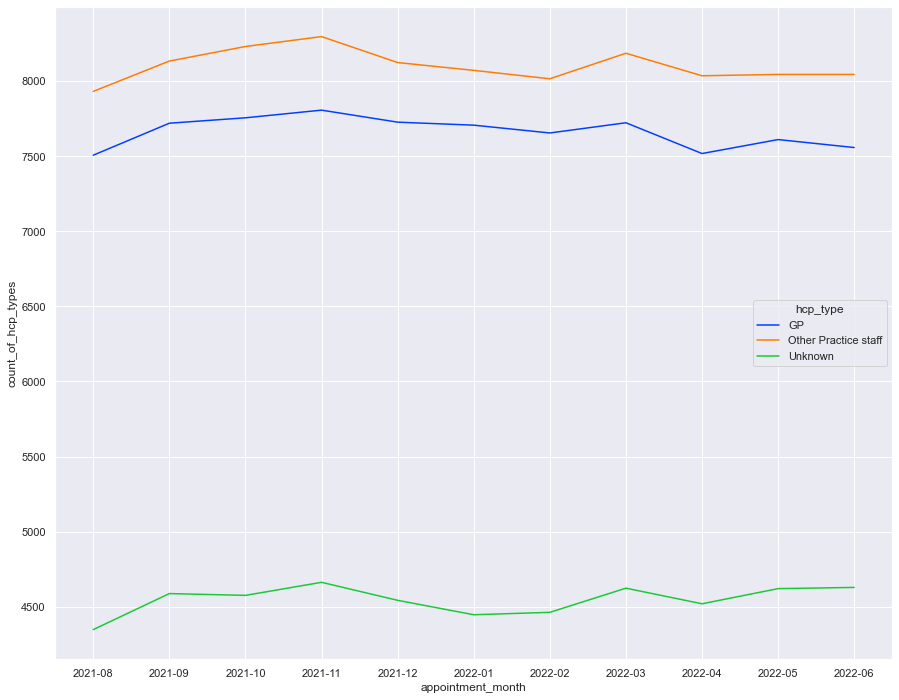

In [174]:
ar_hcp = ar.groupby(['appointment_month', 'hcp_type'])[['hcp_type']].count()

ar_hcp

ar_hcp.rename(columns = {'hcp_type':'count_of_hcp_types'}, inplace = True)

ar_hcp.reset_index(inplace=True)

ar_hcp
sns.lineplot(x='appointment_month', y='count_of_hcp_types', data=ar_hcp, hue='hcp_type', ci=None, palette='bright')




In [ ]:
Count of HCP types follows a similar trend for both GPs and Other practice staff. Other practice staff is however higher.
The peak occurs around november 2021 which seems to be the busiest month.


**Question 3:** Are there significant changes in whether or not visits are attended?

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

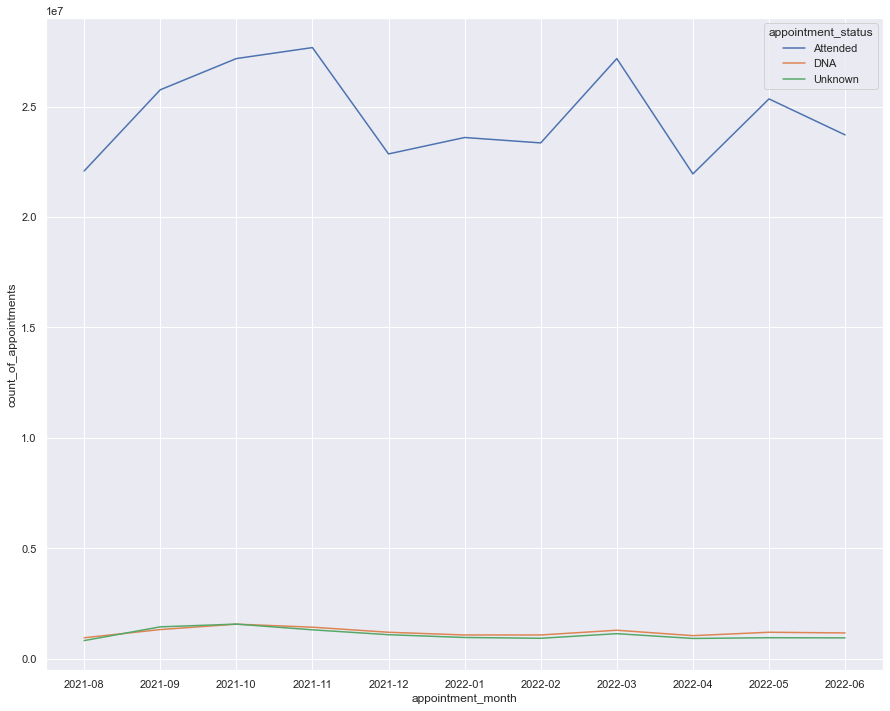

In [102]:
# Create a line plot to answer the question.
ar = pd.read_csv("appointments_regional.csv")

ar_as = ar.groupby(['appointment_month', 'appointment_status'])[['count_of_appointments']].sum()
ar_as.reset_index(inplace=True)

ar_as

sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_as[ar_as['appointment_month']>='2021-08'],
             hue='appointment_status')

The attendance line is extremely volatile across the months with frequent rises and dips.
However the DNA line is quite flat throughout and any rises are extremely small.

**Question 4:** Are there changes in terms of appointment type and the busiest months?

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointment_types'>

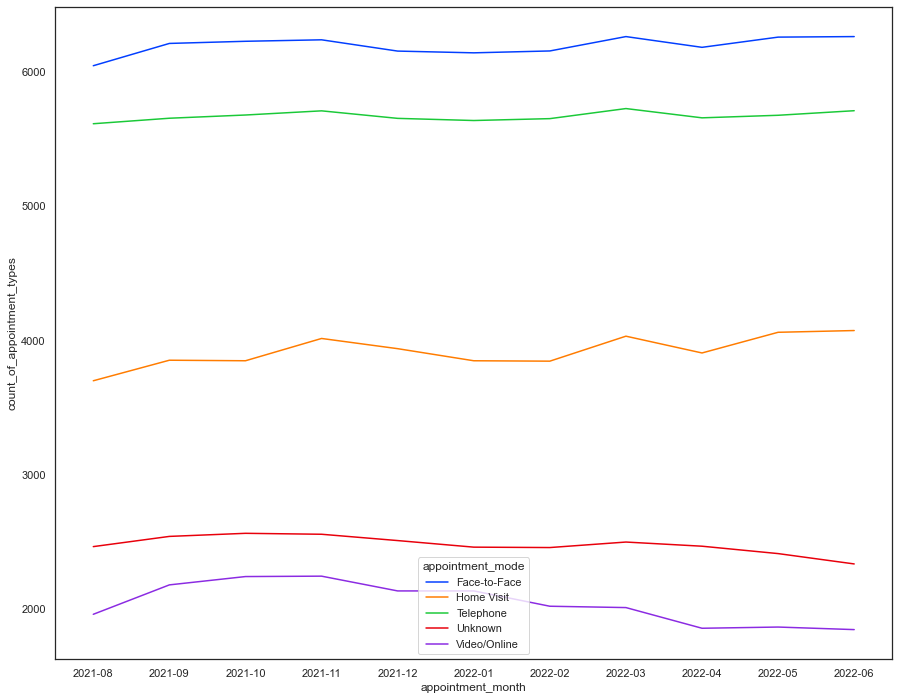

In [72]:
# Create a line plot to answer the question.
ar_am = ar.groupby(['appointment_month', 'appointment_mode',])[['appointment_mode']].count()

ar_am.rename(columns = {'appointment_mode':'count_of_appointment_types'}, inplace = True)

ar_am.reset_index(inplace=True)

ar_am

sns.lineplot(x='appointment_month', y='count_of_appointment_types', data=ar_am, hue='appointment_mode', ci=None, palette='bright')


**Question 5:** Are there any trends in time between booking an appointment?

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_durations'>

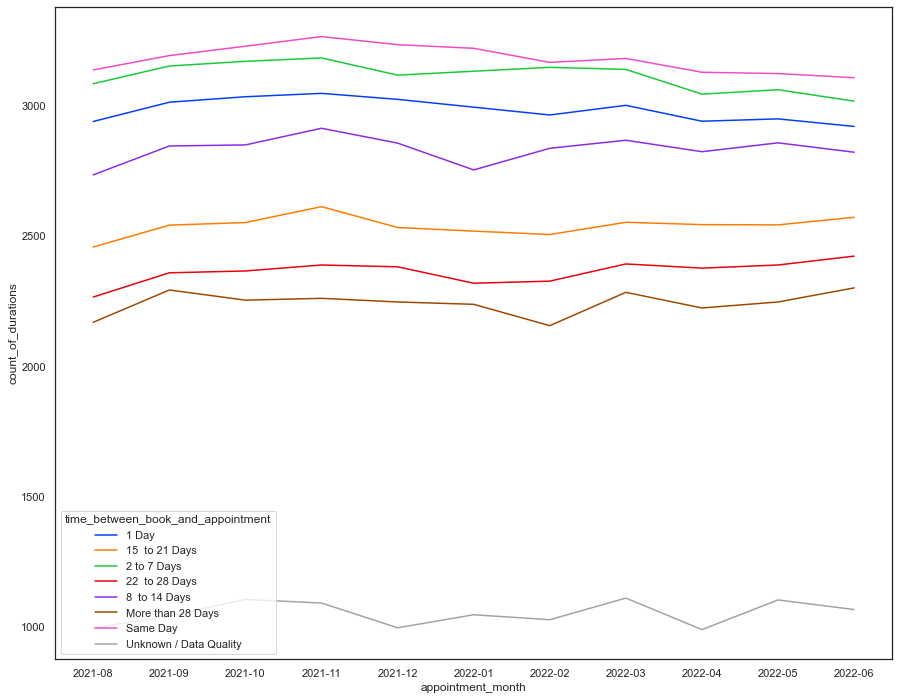

In [73]:
# Create a line plot to answer the question.
ar_at = ar.groupby(['appointment_month', 'time_between_book_and_appointment',])[['time_between_book_and_appointment']].count()

ar_at.rename(columns = {'time_between_book_and_appointment':'count_of_durations'}, inplace = True)

ar_at.reset_index(inplace=True)

ar_at


sns.lineplot(x='appointment_month', y='count_of_durations', data=ar_at, hue='time_between_book_and_appointment', ci=None, palette='bright')


**Question 6:** How do the spread of service settings compare?

In [74]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [75]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_month= nc.groupby(['appointment_month','service_setting'])[['count_of_appointments']].sum()
nc_month.reset_index(inplace=True)
# View the DataFrame.
nc_month

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

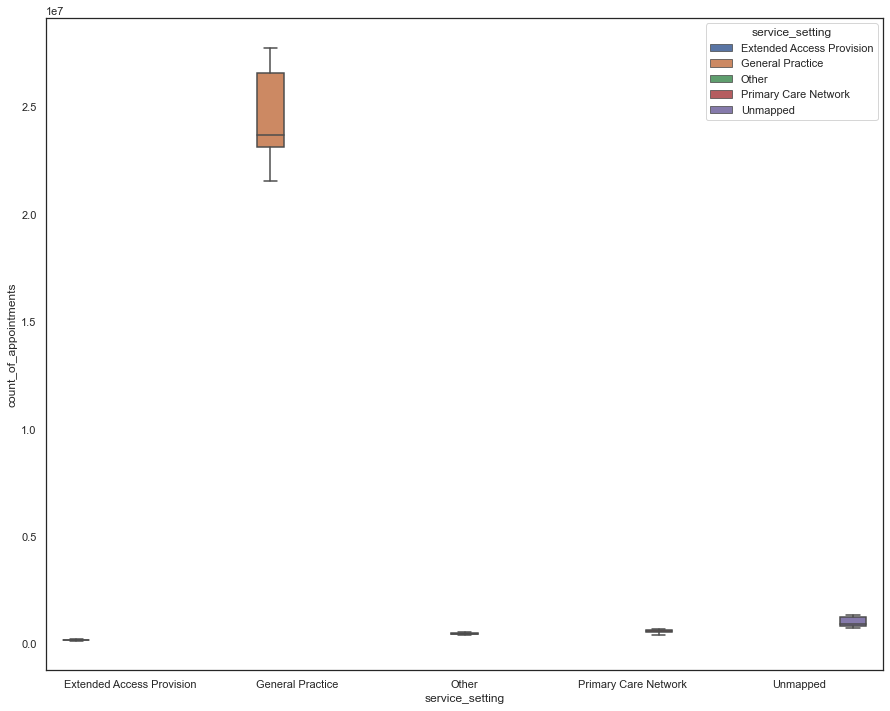

In [76]:
# Create a boxplot to investigate spread of service settings.
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_month, hue='service_setting')

<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

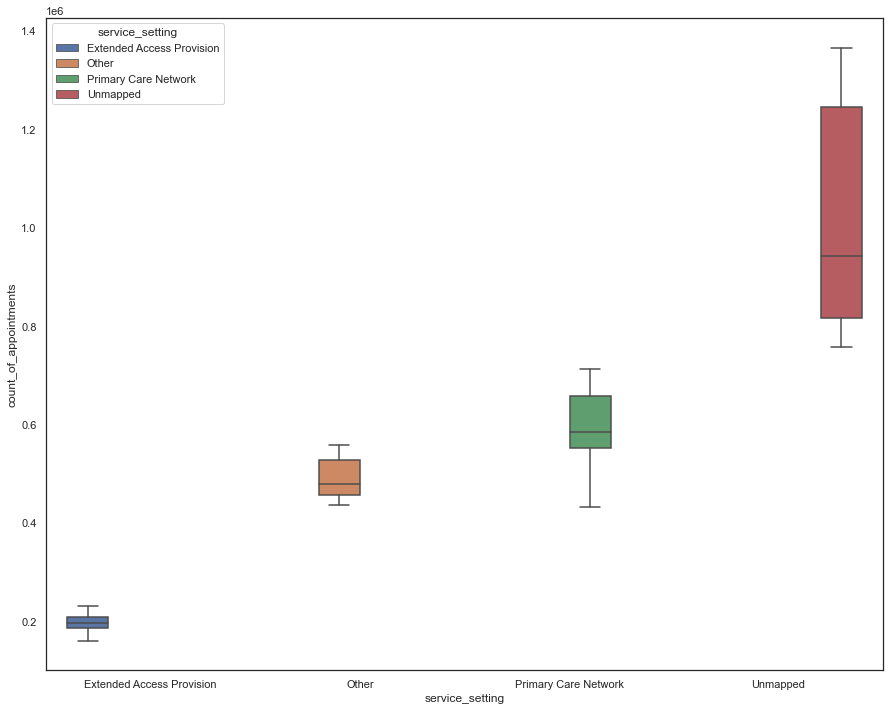

In [77]:
# Create a boxplot to investigate the service settings without GP.
sns.boxplot(x='service_setting', y='count_of_appointments', 
            data=nc_month[nc_month['service_setting'].isin(['Extended Access Provision', 'Other', 'Primary Care Network', 'Unmapped'])],
            hue='service_setting')

# 

### Provide a summary of your findings and recommendations based on the analysis.

- The count of appointments across different months is extremely volatile, but the peak occurs in November 2021.
- The most common HCP type was 'Other Practice Staff', followed by GPs. 
- HCP types rise up until November 2021 before starting to decline again. This is where their peaks are.
- Looking at appointment statuses, attended appointments were significantly higher than none attended appoitnments.
- Even, if you counted the 'unknown' values as unattended, they would still be a lot less than attended appointments.
- There was a sharp decline in the number of attended appointments from 11/21 to 12/21.
- This was not matched by an increase in DNA which could mean overall there was a lower number of appointments booked.
- The most popular mode of appointment was face-to face, followed by telephone appointments.
- The lines are quite flat across the time frame with small rises and falls, nothing too drastic.
- The count of appointments for patients that were seen on the same day of booking increases till November 2021 before falling.
- The count of appointments with '2 to 7 days' closely follows this trend.
- The count of appointments with waiting time '8-14 days' is volatile across the month with multiple dips and rises.
- Looking at spread of service settings, the IQR for 'Primary Care Network' is higher than that of the other two service settings.
- This indicates that the count of appointments were more spread out for Primary Care Network.